<a href="https://colab.research.google.com/github/Mina0402/EU_M_Math-Repository/blob/main/Chap03_Cm_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline
%precision 3

import requests, zipfile
from io import StringIO
import io

url='https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r=requests.get(url, stream=True)
z=zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
ls

sample_data/  student-mat.csv  student-merge.R  student-por.csv  student.txt


In [ ]:
math_data=pd.read_csv('student-mat.csv', sep=';')

In [ ]:
math_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
math_data.sort_values(by=['sex'])
math_data.sort_values(by=['sex'], ascending=True)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
319,GP,F,18,U,GT3,T,4,4,teacher,other,...,4,4,4,3,3,5,2,11,11,11
318,GP,F,17,R,GT3,T,3,4,at_home,services,...,4,3,4,2,5,5,0,11,11,10
152,GP,F,15,R,GT3,T,3,3,services,services,...,4,2,1,2,3,3,8,10,10,10
317,GP,F,18,U,GT3,T,4,3,other,other,...,4,3,4,1,1,5,9,9,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,GP,M,16,U,GT3,T,3,4,other,other,...,3,4,5,2,4,2,0,6,5,0
166,GP,M,16,U,GT3,T,2,2,other,other,...,4,3,5,2,4,4,4,10,10,10
165,GP,M,16,U,GT3,T,3,2,services,services,...,4,5,2,1,1,2,16,12,11,12
177,GP,M,17,U,GT3,T,3,3,other,other,...,4,3,4,1,4,4,4,6,5,6


In [ ]:
data_male=math_data[math_data['sex']== 'M' ].sort_values('G1')
data_female=math_data[math_data['sex']== 'F' ].sort_values('G1')

In [ ]:
rel_freq_M=(np.sort(data_male['G1']))/np.sum(np.sort(data_male['G1']))
rel_freq_F=(np.sort(data_female['G1']))/np.sum(np.sort(data_female['G1']))

In [ ]:
rel_cum_freq_M=rel_freq_M.cumsum()
rel_cum_freq_F=rel_freq_F.cumsum()
#スコアの男女別の累積比率

In [ ]:
pop_count_M=np.arange(len(data_male))/np.array(len(data_male))
pop_count_F=np.arange(len(data_female))/np.array(len(data_female))
#人数の累積比率

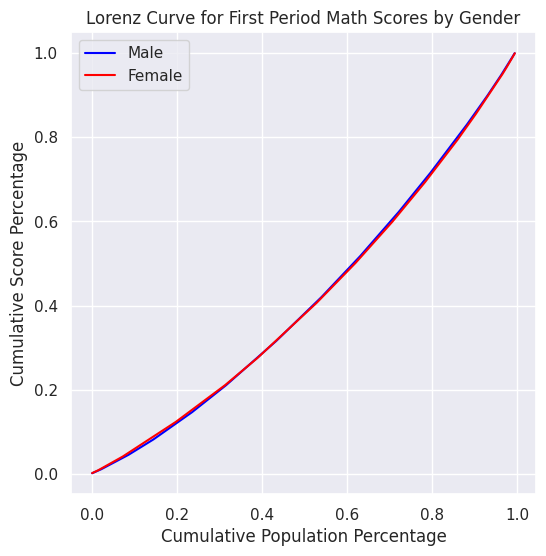

In [ ]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)

Lor_curve_M=ax.plot(pop_count_M, rel_cum_freq_M, color='blue', label='Male')
Lor_curve_F=ax.plot(pop_count_F, rel_cum_freq_F, color='red', label='Female')

ax.set_title('Lorenz Curve for First Period Math Scores by Gender')
ax.set_xlabel('Cumulative Population Percentage')
ax.set_ylabel('Cumulative Score Percentage')

plt.legend()
plt.show()


In [ ]:
from scipy import integrate

gini_M=2*(0.5-integrate.trapz(rel_cum_freq_M, pop_count_M))
gini_F=2*(0.5-integrate.trapz(rel_cum_freq_F, pop_count_F))
print('男性の一期目の成績のジニ係数:', gini_M)
print('女性の一期目の成績のジニ係数:', gini_F)

男性の一期目の成績のジニ係数: 0.1719811560988027
女性の一期目の成績のジニ係数: 0.17238700073127333
